The following cell imports packages that will be used in the code. Brief descriptions are commented. 

In [21]:
# import os does this: "provides a way of using operating system dependent functionality"
# import sys does this: "lets us access system-specific parameters and functions"
# not sure when these are necessary or not
import os,sys
# glob = "used to return all file paths that match a specific pattern"
# used for file matching 
import glob 
# pandas = data analysis library
# based on matplotlib and
#numpy, makes it simpler to use them
import pandas
from osgeo import gdal
# datetime provides commands to deal with dates and times
# which command? 
#import datetime 
from datetime import date
from datetime import datetime
from datetime import timedelta
# able to parse most known formats to represent a date/time
# this is an extension to datetime 
from dateutil import parser
# numpy is great for working with data
import numpy as np
# these are filteres for smoothing the image 
# gaussian vs. uniform filter: see plot I made for differences
# are there other filters I could import/use? 
from scipy.ndimage import gaussian_filter, uniform_filter
# for plotting 
import matplotlib.pyplot as plt
# this isn't currently being used, I don't think. Something for visualization in plots.
#import matplotlib.patches as mpatches

# displays nicely 
%matplotlib  widget

In [22]:
workdir = '/data/ocp4/LagunaSalada/'

# azimuth downlooking 
alooks=4
# range downlooking 
rlooks=20

#cropdir='cropped_9000_20_10000_1780/'
cropdir='cropped_9000_1800_18000_3600/'

date1='20180926'
date2='20181231'

#date1='20190816'
#date2='20200810'

# spans a rain event, or just after
#date1='20181207'
#date2='20181219'

In [23]:
# playing around with dates with datetime and dateutil modules
# calculate number of days between date1 and date2

print("date 1: "+date1+"\ndate 2: "+ date2)

# this was a test for figuring out indexing in python 
#print(int(date1[0]), int(date1[1]), int(date1[2]), int(date1[3]), int(date1[4]), \
#      int(date1[5]), int(date1[6]), int(date1[7]))

#NOTE: indexing in python is weird. 
yr1 = int(date1[:4]) # this means everything before BUT NOT INCLUDING index 4
mo1 = int(date1[4:6]) # start at index 4 and go to 6, not including it
dy1 = int(date1[6:]) # start at index 6 and go until the end of array 
yr2 = int(date2[:4])
mo2 = int(date2[4:6])
dy2 = int(date2[6:])

# test that it read the dates correctly 
print(yr1, mo1, dy1,"   ", yr2, mo2, dy2)

# below is from internet
#from datetime import date
d1 = date(yr1, mo1, dy1)
d2 = date(yr2, mo2, dy2)
delta = d2 - d1
print(str(delta.days)+" day pair")

date 1: 20180926
date 2: 20181231
2018 9 26     2018 12 31
96 day pair


In [24]:
# defining variables, for the range + azimuth pixel 

# why do we need x1 and y1? starting pixel value? 
x1=0
#dx=10000
dx=18000
y1=0
#dy=1780
dy=3600

# this opens up the first SLC (date1)
ds = gdal.Open(workdir+"/"+cropdir+"/SLC_vv/"+date1+"/"+date1+".slc.full", gdal.GA_ReadOnly)
# reads it into array slc1. x1, y1 are the starting indices. dx, dy are the sizes 
# pretty sure the x1,y1,dx,dy arguments are unecessary. Tried w/out and worked the same. 
slc1 = ds.GetRasterBand(1).ReadAsArray(x1,y1,dx,dy)
# this opens up the second SLC (date2)
ds = gdal.Open(workdir+"/"+cropdir+"/SLC_vv/"+date2+"/"+date2+".slc.full", gdal.GA_ReadOnly)
# reads it into array slc2
slc2 = ds.GetRasterBand(1).ReadAsArray(x1,y1,dx,dy)

# now do the math to create interferogram 
int12 = slc1 * np.conj(slc2)
# int12 is a complex array of dimensions: (see below)
print("array dimensions: ("+str(int12.shape[0])+", "+str(int12.shape[1])+")")
print('\n')
# print the dimension of the array 
print("how many dimensions in the array: "+str(int12.ndim))
print('\n')

print("the type of data in the array is: "+str(type(int12[0,0])))
print('\n')

# how to access just the 1000th row of data (first 10 entries in row), for example: 
print("(test to extract subset of data)")
print("1000th row of data, first 10 values:\n") 
# reminder: indexing starts at 0 with python
print(int12[999, 0:9])
print('\n')


array dimensions: (3600, 18000)


how many dimensions in the array: 2


the type of data in the array is: <class 'numpy.complex64'>


(test to extract subset of data)
1000th row of data, first 10 values:

[  840.02484+1788.879j   1169.5682  +612.8551j   199.43121 -984.3992j
  1441.0273 -1977.0001j   507.0022 +1163.6606j -1564.6404 +5390.0874j
 -3701.1067 +3030.6692j -4176.9883 -2310.158j    252.06587-1184.9232j]




In [25]:
# what are max and min values of slc1 amplitudes? Test for plotting later.
print(np.max(np.abs(slc1)))
print(np.min(np.abs(slc1)))

22454.895
0.0060999263


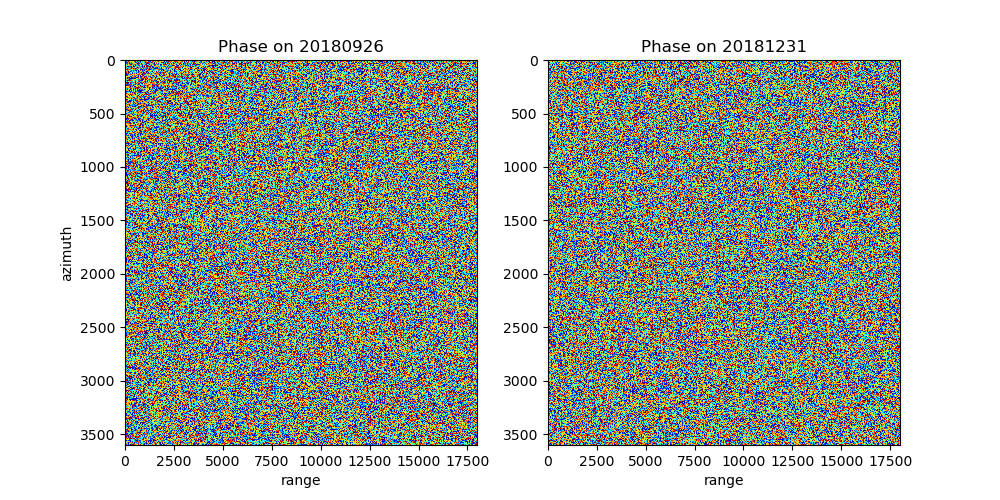

In [26]:
# CAN SKIP THIS, MAKING FIGURE FOR PRESENTATION

# Plot phase of 2 slcs and how they look meaningless 
plt.figure(figsize=(10, 5))

plt.subplot(1,2,1)
plt.imshow(np.angle(slc1),vmin=-np.pi, vmax=np.pi, cmap='jet', aspect='auto', interpolation='nearest')
plt.ylabel('azimuth')
plt.xlabel('range')
plt.title("Phase on "+str(date1))

plt.subplot(1,2,2)
plt.imshow(np.angle(slc2),vmin=-np.pi, vmax=np.pi, cmap='jet', aspect='auto', interpolation='nearest')
plt.xlabel('range')
plt.title("Phase on "+str(date2))

#plt.subplot(1,1,1)
#plt.imshow(np.angle(filtimageUni), cmap='jet', aspect='auto', interpolation='nearest')
#plt.ylabel('azimuth')
#plt.xlabel('range')
#plt.title(str(delta.days)+" day interferogram")

plt.show()

#plt.savefig("SLC_Int.png", transparent=True)


Try plotting the full res interferogram below. Then I can compare it to the filtered version that will be plotted next.

Text(0.5, 1.0, 'Amplitude on 20180926')

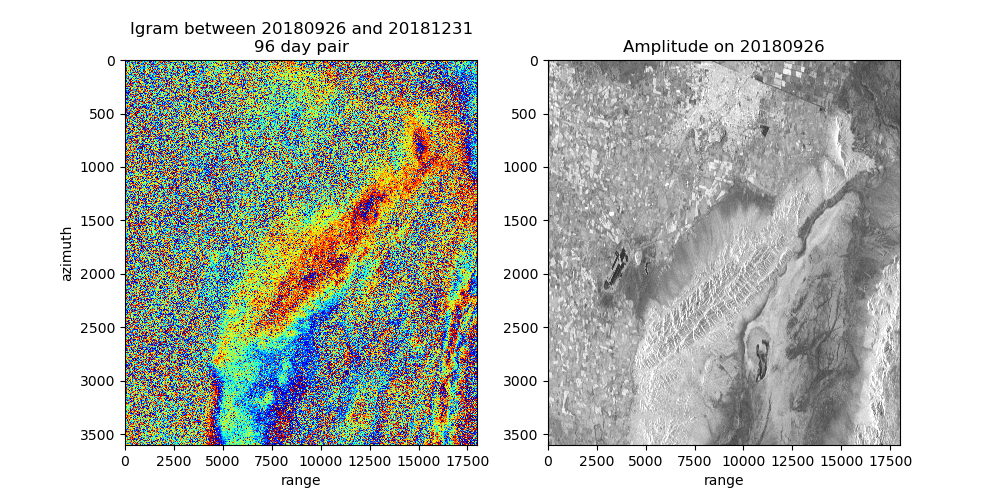

In [27]:
## try plotting the full res interferogram before filtering in next step
plt.figure(figsize=(10, 5))

plt.subplot(1,2,1)
plt.imshow(np.angle(int12),vmin=-np.pi, vmax=np.pi, cmap='jet', aspect='auto', \
           interpolation='nearest')
plt.ylabel('azimuth')
plt.xlabel('range')
plt.title("Igram between "+str(date1)+" and "+str(date2)+"\n"+str(delta.days)+" day pair")

plt.subplot(1,2,2)
# without the vmin, vmax it shows up as all black. 
# But it should be automatically calculating the range. Why? 
###NOTE FROM RO - there are a FEW very bright points, so the max is high.
plt.imshow(np.log10(np.abs(slc1)), vmin=1, vmax=2.2, cmap='gray', aspect='auto')
plt.xlabel('range')
plt.title("Amplitude on "+str(date1))

#plt.savefig("Full_res_igram.png")


In [28]:
# Is a uniform filter the same as a 2D boxcar filter? (w/ dimensions alooks x rlooks)
###From ro - yes!
filtmagUni = uniform_filter(np.abs(int12), size=[alooks,rlooks])
filtimageUni = uniform_filter(int12, size=[alooks,rlooks])
filtimageUni = filtimageUni/filtmagUni

# commented out to not take so long
filtmagGau = gaussian_filter(np.abs(int12), sigma=[alooks,rlooks])
filtimageGau = gaussian_filter(int12, sigma=[alooks,rlooks])
filtimageGau = filtimageGau/filtmagGau


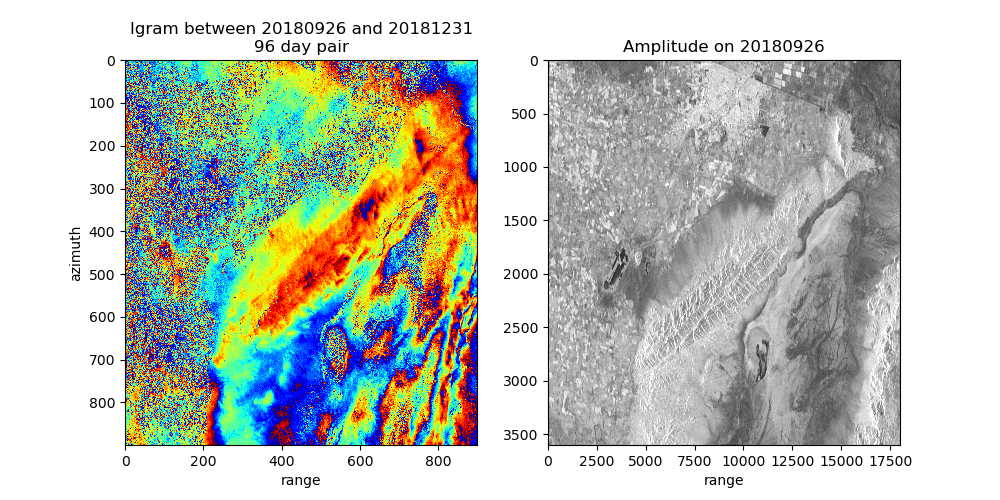

In [29]:
# try plotting the downsampled interferogram 
plt.figure(figsize=(10, 5))

plt.subplot(1,2,1)
plt.imshow(np.angle(filtimageUni[0:int12.shape[0]:alooks,0:int12.shape[1]:rlooks]),vmin=-np.pi, vmax=np.pi, cmap='jet', aspect='auto', interpolation='nearest')
#plt.imshow(np.angle(filtimageUni),vmin=-np.pi, vmax=np.pi, cmap='jet', aspect='auto', interpolation='nearest')
plt.ylabel('azimuth')
plt.xlabel('range')
plt.title("Igram between "+str(date1)+" and "+str(date2)+"\n"+str(delta.days)+" day pair")

plt.subplot(1,2,2)
# without the vmin, vmax it shows up as all black. 
# But it should be automatically calculating the range. Why? ###NOTE FROM RO - there are a FEW very bright points, so the max is high.
plt.imshow(np.log10(np.abs(slc1)), vmin=1, vmax=2.2, cmap='gray', aspect='auto')
plt.xlabel('range')
plt.title("Amplitude on "+str(date1))
plt.show()

#plt.savefig("low_res_igram.png")

In [30]:
dim = np.shape(filtimageUni)
print(dim[1])
dimtest = np.shape(filtimageUni)[1]
print(dimtest)

18000
18000


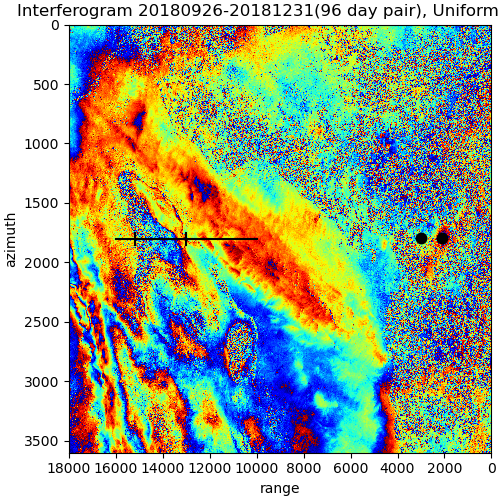

In [31]:
# now plot the two smoothing methods side-by-side
plt.figure(figsize=(5, 5), layout='constrained')

# define a line to test where I want my transect to be located
transectx = [10000, 16000]
transecty = [1800, 1800]
crossx = [13030, 13030]
crossx2 = [15200, 15200]
crossy = [1750, 1850]

#plt.subplot(2,1,1)

plt.imshow(np.angle(filtimageUni),vmin=-np.pi, vmax=np.pi, cmap='jet', aspect='auto',interpolation='nearest')
plt.title("Interferogram "+str(date1)+"-"+str(date2)+"("+str(delta.days)+" day pair), Uniform filter")
plt.ylabel('azimuth')
plt.xlabel('range')
plt.plot(transectx, transecty,'k')
plt.plot(crossx, crossy, 'k')
plt.plot(crossx2, crossy, 'k')
plt.xlim(np.shape(filtimageUni)[1], 0)

# narrower range/azimuth for display purposes)
#plt.xlim([5000, 0])
#plt.ylim([2400, 1200])

# put white dot for ~center of Cerro Prieto Geothermal field 
CP = [2090, 1793]
notCP = [3000, 1793]
#plt.plot(CP[0], CP[1], markersize=8, color='k', marker='.')
# another white dot just outside Cerro Prieto 
#plt.plot(notCP[0], notCP[1], markersize=8, color='k', marker='.')

# put white dot for inside Laguna Salada, one for outside
LS = [14500, 1800]
notLS = [16000, 1800]

plt.plot(CP[0], CP[1], color='k', marker='.', ms=15)
# another white dot just outside Cerro Prieto 
plt.plot(notCP[0], notCP[1], color='k', marker='.', ms=15)


#plt.subplot(2,1,2)
#plt.imshow(np.angle(filtimageGau),vmin=-np.pi, vmax=np.pi, cmap='jet', aspect='auto',interpolation='nearest')
#plt.title("Gaussian filter")
#plt.xlabel('range')
#plt.plot(transectx, transecty,'k')
#plt.plot(crossx, crossy, 'k')
#plt.plot(crossx2, crossy, 'k')
#plt.xlim(np.shape(filtimageUni)[1], 0)
plt.show()

#plt.savefig("Uniform_vs_Gaussian_Filts2.png")


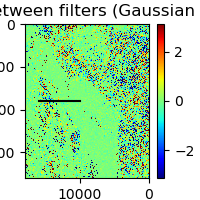

In [32]:
# plot the difference between the two types of filters. Where is the difference most prominent? 

fig=plt.figure(figsize=(2, 2))

plt.subplot(1,1,1)
plt.imshow((np.angle(filtimageGau)-np.angle(filtimageUni)),vmin=-np.pi, vmax=np.pi, cmap='jet', aspect='auto',interpolation='nearest')
plt.title("Difference between filters (Gaussian - Uniform)")
plt.ylabel('azimuth')
plt.xlabel('range')
plt.colorbar()
plt.plot(transectx, transecty,'k')
plt.xlim(np.shape(filtimageUni)[1], 0)
plt.show()

#plt.savefig("Uniform-Gaussian_Filts.png")


In [33]:
# extract a transect and plot the phase? mag? values 
# the 1800th line of the image is what I want to extract 


# make a variable with just data I want
# how do I make an imaj. number of length 1 and 2radians, 75 degrees or something 
# matlab e^(i*theta)
# is there a numpy way of saying imag. number? it's j
# 2 was the theta in radians
# same as cos(theta)+i*sin(theta)
#theta = 2;

# 90 makes the coherent part centered
# 240 makes the part in Laguna Salada more centered 
theta = 90*(np.pi/180)
#b = np.exp(1j*theta)
# test what b is, print b 
# use it with cos/sin and see if it's the same 
b = np.cos(theta)+1j*np.sin(theta)

size of extract: (30, 6000)
rangemax-rangemin: 6000
size of condensed: (6000,)


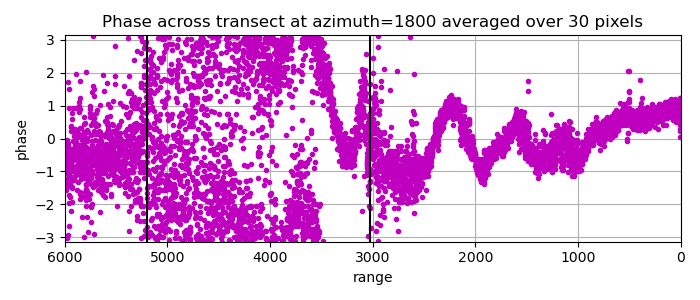

In [34]:
# the row I want to extract/condense around 
azrow = 1800
# how many rows off of this transect I want to average
distoffrow = 15
# bounds on range
rangemin = 10000
rangemax = 16000
# now extract the distoffrow*2 by rangemax-rangemin subset of data from igram
extract = np.dot(int12[azrow-distoffrow:azrow+distoffrow, rangemin:rangemax],np.conj(b))
# below is just a single row of pixels
#extract = np.dot(int12[azrow,:],np.conj(b))

#extract = int12[azrow-distoffrow:azrow+distoffrow, np.arange(rangemin,rangemax,1)]
#a = np.arange(rangemin,rangemax,1)
#print(np.shape(a))

# try pulling out ten rows, average over the perpendicular to the transect 
# np.mean has argument for which dimension I'm looking at
# this will be smoother 

# make sure this is the right size array 
print("size of extract: "+str(np.shape(extract)))
print("rangemax-rangemin: "+str(rangemax-rangemin))

# average over the columns of the data array 
# axis=0 makes sure it does mean over the columns 
condensed = np.nanmean(extract,axis=0)
# this shows (3000,) as the shape. Which means it is vectors
print("size of condensed: "+str(np.shape(condensed)))


fig=plt.figure(figsize=(7, 3), tight_layout=True)
# plotting the phase of the condensed data 
plt.plot(np.angle(condensed),'m.') 
plt.xlabel('range')
plt.ylabel('phase')
plt.xlim([rangemax-rangemin, 0])
plt.ylim([-np.pi,np.pi])

# this is where Laguna shoreline begins
plt.axvline(x = 13030-rangemin, color='k')
plt.axvline(x = 15200-rangemin, color='k')

plt.title("Phase across transect at azimuth="+str(azrow)+" averaged over "+str(2*distoffrow)+" pixels")
plt.grid()
plt.show()

#plt.savefig("Phase_transect_azimuth1800.png")


<class 'numpy.ndarray'>


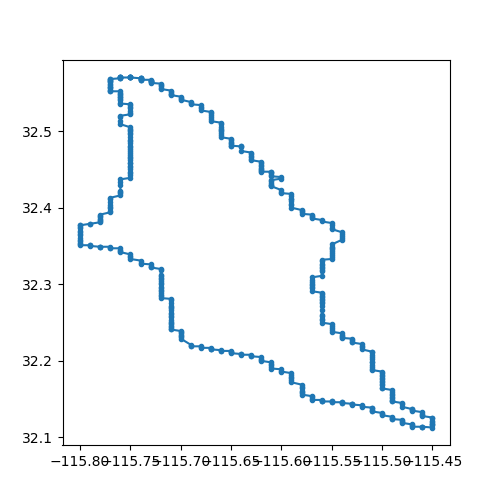

In [35]:
# read in the Laguna outline file 
# SOMETHING IS WRONG 

Laguna_outline = np.genfromtxt('Laguna.csv', delimiter=',', dtype=float, names=True, case_sensitive=True)

# this technically works ...
Laguna_outline = np.loadtxt('Laguna.csv', delimiter=',', dtype=float)

#print(Laguna_outline[0:20])
print(type(Laguna_outline[0]))

# cast to a float- didn't work.
#Laguna_outline = Laguna_outline.astype(float)

fig=plt.figure(figsize=(5,5))
plt.plot(Laguna_outline[:,0],Laguna_outline[:,1],'.-')
plt.show()


Ran fill_missing_precip_data_with_NaNs.ipynb only once before the following code cells work. 

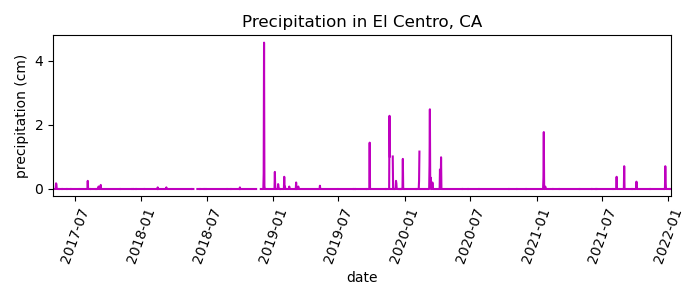

In [36]:
# Read in precipitation data and plot it 
precip = np.loadtxt('/data/ocp4/LagunaSalada/3_precip/precip.txt', delimiter=',', skiprows=3, dtype=str)

precipDates = precip[:,0]
precip = precip[:,1]
#print(type(precip[0]))
precip = precip.astype(float)
#print(precip)
# convert to cm from inches 
precip = precip*2.54

# make the dates from precip.txt into datetime objects
my_dates=[]
for i in range(0,len(precipDates)):
    my_dates.append(datetime.strptime(str(precipDates[i]).replace('\n',''), '%Y-%m-%d'))
    

fig=plt.figure(figsize=(7,3), tight_layout=True)
#plt.xticks(np.arange(0, np.size(precipDates)+1, 182))
plt.xticks(rotation = 70)

#plt.plot(precipDates, precip,'-m')
plt.plot(my_dates, precip,'-m')
plt.xlabel('date')
plt.ylabel('precipitation (cm)')
plt.xlim([np.min(my_dates), np.max(my_dates)])
#plt.xlim([0, np.size(precip)])
plt.title('Precipitation in El Centro, CA')
plt.show()


<class 'list'>


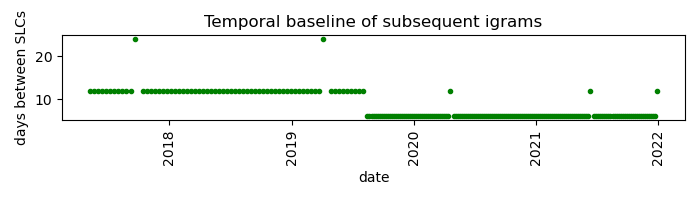

In [37]:
# Can I plot a nice timeline of all the slcs I have? 

dates = [os.path.basename(x) for x in glob.glob(workdir+cropdir+"SLC_vv/2*")]
dates=sorted(dates)
#print(str(len(dates))+' dates so far!')
#nd=len(dates)

# dates is a list of strings
print(type(dates))

# convert strings to datetime objects 
slc_dates=[]
for i in range(0,len(dates)):
    slc_dates.append(datetime.strptime(str(dates[i]).replace('\n',''), '%Y%m%d'))

# calculate dt between slcs 
dt = np.diff(slc_dates)
#print(dt[1])
#print(len(dt))
    
dt2 = np.zeros(len(dt))

for i in range(0,len(dt)):
    dt2[i] = dt[i].days
    
#print(len(dt2))
#print(type(dt2[0]))
  
fig=plt.figure(figsize=(7,2), tight_layout=True)
plt.xticks(rotation = 90)
plt.plot(slc_dates[0:len(slc_dates)-1],dt2,'.g')
#plt.xlim([np.min(slc_dates), np.max(slc_dates)])
#plt.ylim([0, 16])
plt.xlabel('date')
plt.ylabel('days between SLCs')
plt.title('Temporal baseline of subsequent igrams')
plt.show()